In [2]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

In [3]:
#abrir mi fits
slit4 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits'
sp4 = fits.open(slit4)

sp4.info()
sp4[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2245, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_7454/4204268105.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

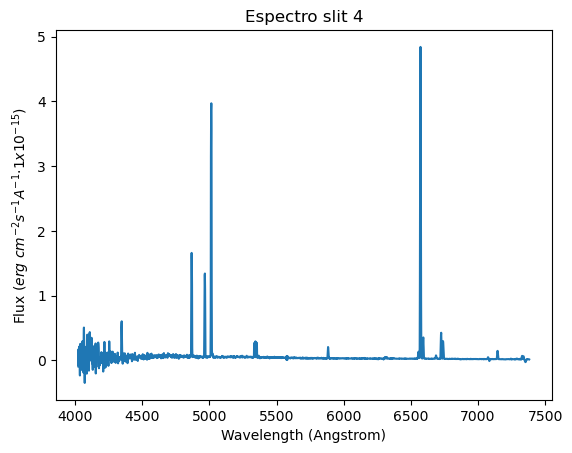

In [4]:
# extraer data (flux)
data4=sp4[0].data
header4=sp4[0].header
obj_name4 = header4.get("OBJECT", "Unknown")

flux4=data4[0]
w4=WCS(header4, naxis=1, relax=False, fix=False)
wave4=w4.wcs_pix2world(np.arange(len(flux4)),0)[0]

plt.plot(wave4, flux4)
plt.title("Espectro slit 4")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [5]:
wave4, flux4

(array([4024.0715332 , 4025.56758475, 4027.0636363 , ..., 7378.2191081 ,
        7379.71515965, 7381.2112112 ]),
 array([-0.09429397,  0.17127489, -0.08293189, ...,  0.01595764,
         0.01675883,  0.01477239], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_7454/2236862303.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


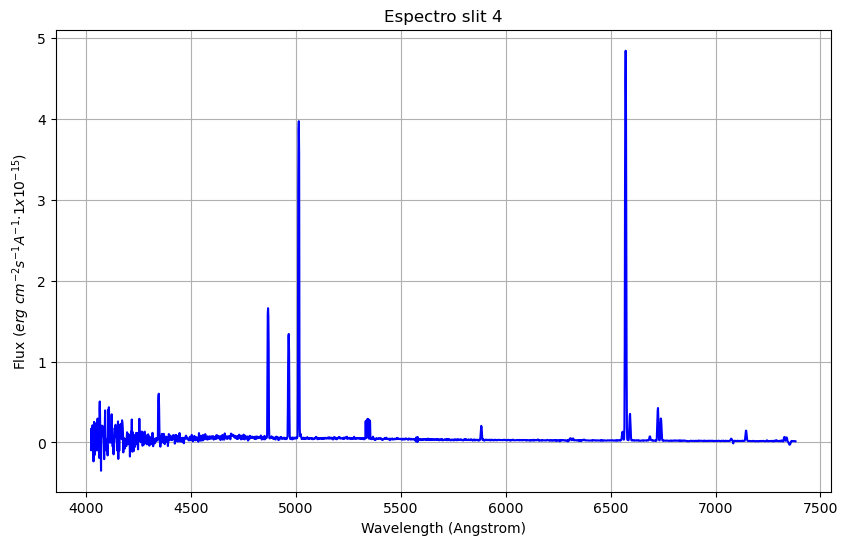

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave4, flux4, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 4')
plt.grid(True)
plt.show()

In [7]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave4_f99 = extinction.fitzpatrick99(wave4, 0.299, 3.1)
print(f' extinción en magnitudes para slit 4 con f99: {wave4_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 4 con f99: [0.42348027 0.42335174 0.42322325 ... 0.18912717 0.18906487 0.1890026 ]


In [8]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux4}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux4_f99 = remove(fitzpatrick99(wave4, 0.299, 3.1), flux4)
print(f'valor de flujo deredden para slit 4 con f99: {flux4_f99}')


valor de flujo original: [-0.09429397  0.17127489 -0.08293189 ...  0.01595764  0.01675883
  0.01477239]
valor de flujo deredden para slit 4 con f99: [-0.13927592  0.25294982 -0.12246468 ...  0.01899413  0.01994663
  0.01758134]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_7454/4061225146.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


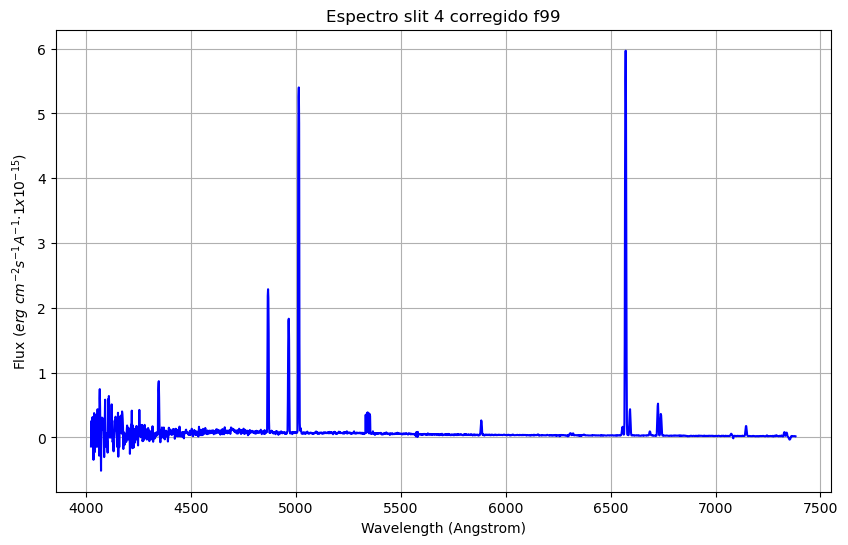

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave4, flux4_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 4 corregido f99')
plt.grid(True)
plt.show()

In [10]:
resta_f99 = flux4_f99 - flux4
resta_f99

array([-0.04498195,  0.08167494, -0.03953279, ...,  0.00303649,
        0.0031878 ,  0.00280894])

In [11]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data4[0] = flux4_f99

# crear nuevo HDU 
slit4corrected = fits.PrimaryHDU(data=data4, header=header4)

# crear nuevo HDUList para guardar en un fits
sp4_corrected = fits.HDUList([slit4corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_2D_f99.fits'
sp4_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_2D_f99.fits


SLIT 8

In [12]:
#abrir mi fits
slit8 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8.fits'
sp8 = fits.open(slit8)

sp8.info()
sp8[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2382, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_7454/328352.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

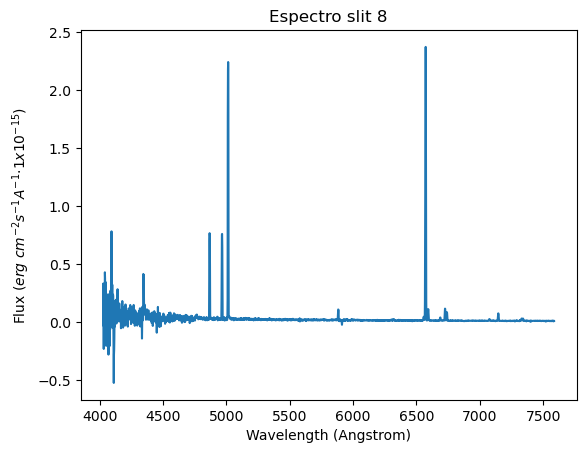

In [13]:
# extraer data (flux)
data8=sp8[0].data
header8=sp8[0].header
obj_name8 = header8.get("OBJECT", "Unknown")

flux8=data8[0]
w8=WCS(header8, naxis=1, relax=False, fix=False)
wave8=w8.wcs_pix2world(np.arange(len(flux8)),0)[0]

plt.plot(wave8, flux8)
plt.title("Espectro slit 8")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [14]:
wave8, flux8

(array([4028.45336914, 4029.94731426, 4031.44125938, ..., 7582.54881382,
        7584.04275894, 7585.53670406]),
 array([-0.02766164,  0.3315872 ,  0.11093271, ...,  0.00995826,
         0.0109825 ,  0.00872552], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_7454/4264924729.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


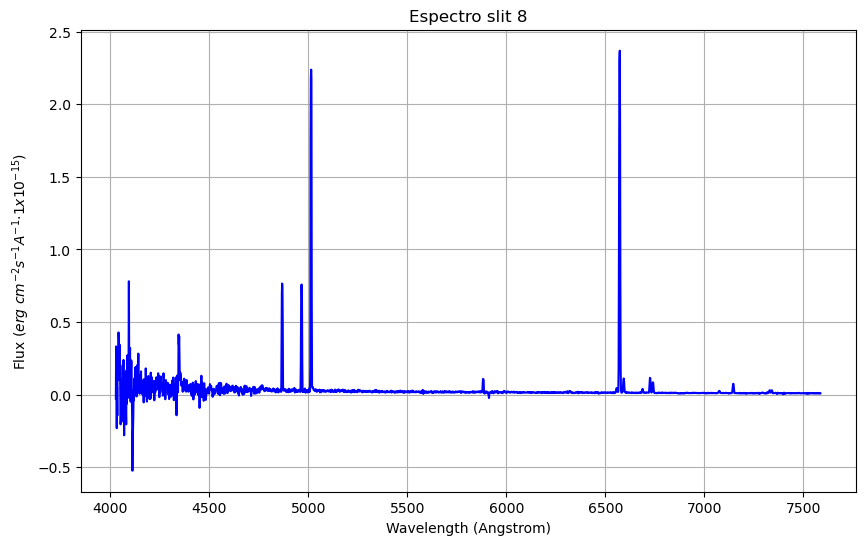

In [15]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave8, flux8, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 8')
plt.grid(True)
plt.show()

In [ ]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave8_f99 = extinction.fitzpatrick99(wave8, 0.299, 3.1)
print(f' extinción en magnitudes para slit 8 con f99: {wave8_f99}') #array of extinction in magnitudes at each input wavelength